In [34]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop'

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [36]:
train=pd.read_csv('train (2) (Autosaved).csv')

In [37]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [38]:
test=pd.read_csv('test (2).csv')
gender=pd.read_csv('gender_submission (2).csv')

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test=test.merge(gender,on='PassengerId')

In [41]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [42]:
del gender

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train.drop(columns=['Ticket','Cabin'],inplace=True)
test.drop(columns=['Ticket','Cabin'],inplace=True)

In [45]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,8.0500,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,63.3583,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,23.0000,S


In [46]:
t=train.groupby(['Pclass','Survived']).size().reset_index()

In [47]:
t.rename(columns={0:'no'},inplace=True)

In [48]:
t=t.pivot_table(index='Pclass',columns='Survived',values='no')

In [49]:
t

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [50]:
train.groupby('Survived').size()


Survived
0    549
1    342
dtype: int64

# 549 people died out of 892

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

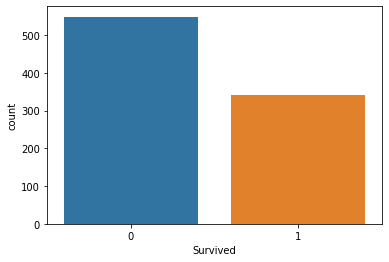

In [51]:
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

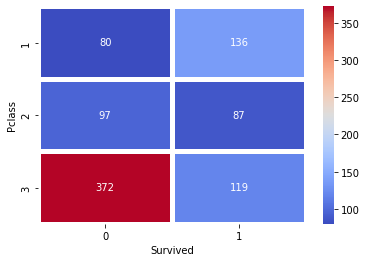

In [52]:
sns.heatmap(t,annot=True,color='white',linewidth=5,cmap='coolwarm',fmt='.0f')

Visual depiction of individuals' survival rates categorized by their socioeconomic class. This chart illustrates that approximately 76% of those belonging to class 3 were unable to survive, while individuals in class 1 exhibited the highest survival rates.

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

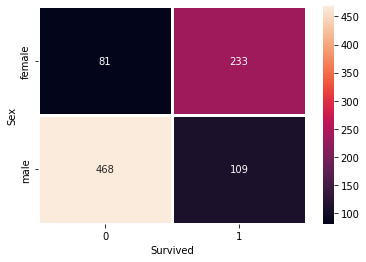

In [53]:
sex_with_survival=train.groupby(['Sex','Survived']).size().reset_index()
sex_with_survival.rename(columns={0:'no'},inplace=True)
sns.heatmap(sex_with_survival.pivot_table(index='Sex',columns='Survived',values='no'),annot=True,linewidth=3,fmt='.0f')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

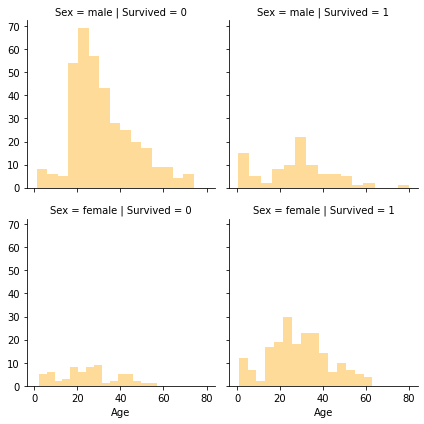

In [54]:

import matplotlib.pyplot as plt
graph=sns.FacetGrid(col='Survived',row='Sex',data=train)
graph=graph.map(sns.distplot,'Age',kde=False,bins=15,hist_kws={'color':'orange'})

To enhance the precision of our analysis and attain more precise outcomes, we should partition the dataset into distinct age brackets. In light of the insights gleaned from the data, it's evident that survival rates exhibit variation across various age categories and gender demographics. Here's how we can delineate these age brackets:

Infants: Aged 0-1
Children: Aged 2-14
Young Adults: Males aged 15-33
Young Adults: Females aged 14-40
Adults: Males aged 34-49
Adults: Females aged 41-50
Seniors: Aged 50 and above
By scrutinizing the data within these age groupings, we can acquire a more intricate and refined comprehension of survival trends predicated on age and gender.

In [55]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [56]:
dataset=[train,test]
for data in dataset:
    data['relatives']=data['SibSp']+data['Parch']

In [57]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,0


In [58]:
# Dropping sib and parch since these two columns make no sense separate
for data in dataset:
    data.drop(columns={'SibSp','Parch'},inplace=True)

In [59]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,0


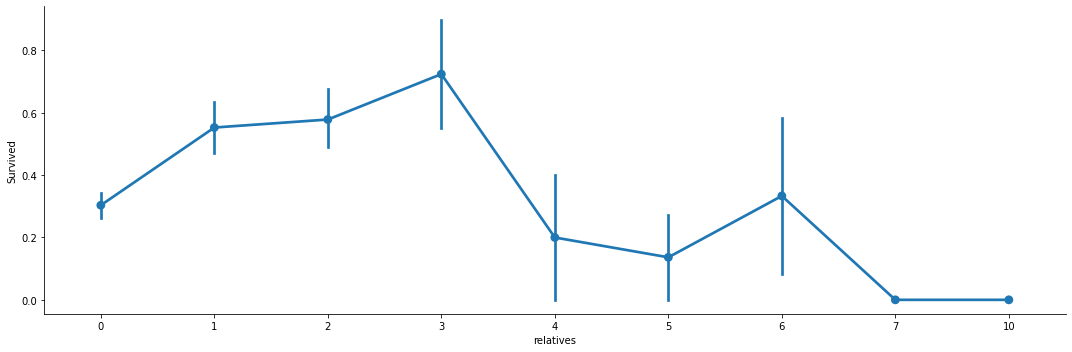

In [60]:
sns.catplot(x='relatives',y='Survived',data=train,kind='point',aspect=3)


The depicted graph indicates that individuals with a family size ranging from 1 to 3 had a notably greater likelihood of surviving.